<h1 style="color:#f25f5c; font-weight:bold">Sales Forecasting and Demand Prediction </h1>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

<h2 style="color:#247BA0; font-weight:bold">Milestone 1: Data Collection, Exploration, and Preprocessing</h2>


<h3 style="color:#70C1B3; font-weight:bold">Data Reading</h3>


In [5]:
data = pd.read_excel('global_superstore_2016.xlsx')
data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [6]:
data.shape

(51290, 24)

In [7]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [40]:
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2014-05-11 21:26:49.155780608,2014-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567
min,1.00000,2012-01-01 00:00:00,2012-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,2013-06-19 00:00:00,2013-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2014-07-08 00:00:00,2014-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2015-05-22 00:00:00,2015-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2015-12-31 00:00:00,2016-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373


<h3 style="color:#70C1B3; font-weight:bold">Preprocessing and Feature Engineering</h3>


<h4 style="color:#FFE066; font-weight:bold">Handling Nulls</h4>


In [43]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [45]:
data.drop(["Postal Code"], axis=1, inplace=True)
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Region            0
Market            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

<h4 style="color:#FFE066; font-weight:bold">Handling Outliers</h4>


In [48]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"Outliers in {col}: {outliers}")


Outliers in Row ID: 0
Outliers in Sales: 5655
Outliers in Quantity: 877
Outliers in Discount: 4172
Outliers in Profit: 9755
Outliers in Shipping Cost: 5909


In [50]:

for col in numerical_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr
    data[col] = data[col].clip(lower=low, upper=up)


In [52]:
# Detect outliers using the IQR method for numerical columns in Training data
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"Outliers in {col}: {outliers}")


Outliers in Row ID: 0
Outliers in Sales: 0
Outliers in Quantity: 0
Outliers in Discount: 0
Outliers in Profit: 0
Outliers in Shipping Cost: 0


<h4 style="color:#FFE066; font-weight:bold">Handling Duplicates</h4>


In [55]:
# Number of Duplicated Rows
data.duplicated().sum()

0

<h4 style="color:#FFE066; font-weight:bold">Extracting Economic Indicators</h4>


In [59]:
def calculate_economic_indicator(order_date, discount):
    year = order_date.year  
    if year < 2005:
        return "Recession"
    elif discount > 10:
        return "Discount Era"
    elif year >= 2015:
        return "Stable Growth"
    else:
        return "Moderate Economy"
    
data['economic_indicators'] = data.apply(lambda row: calculate_economic_indicator(row['Order Date'], row['Discount']), axis=1)


In [60]:
data[['Order Date', 'Discount', 'economic_indicators']].head()

,Order Date,Discount,economic_indicators
0,2014-11-11,0.0,Moderate Economy
1,2014-02-05,0.1,Moderate Economy
2,2014-10-17,0.1,Moderate Economy
3,2014-01-28,0.1,Moderate Economy
4,2014-11-05,0.0,Moderate Economy


In [61]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,economic_indicators
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,Technology,Phones,Samsung Convoy 3,221.980000,2.0,0.0,62.1544,40.77,High,Moderate Economy
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",581.495063,9.0,0.1,-55.2150,57.21,Critical,Moderate Economy
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",581.495063,9.0,0.1,92.0250,57.21,Medium,Moderate Economy
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",581.495063,5.0,0.1,-55.2150,57.21,Medium,Moderate Economy
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",581.495063,8.0,0.0,92.0250,57.21,Critical,Moderate Economy


<h4 style="color:#FFE066; font-weight:bold">Extracting Year, Month, Day, Season</h4>


In [66]:
if 'Order Date' in data.columns:
    data['Order Date'] = pd.to_datetime(data['Order Date'])

    data['Year'] = data['Order Date'].dt.year
    data['Month'] = data['Order Date'].dt.month 
    data['Weekday'] = data['Order Date'].dt.day_name()
    data['IsWeekend'] = data['Weekday'].isin(['Saturday', 'Sunday'])

In [68]:
data['TransactionAge'] = data['Year'].max() - data['Year']

In [70]:
data['Season'] = data['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                           'Spring' if x in [3, 4, 5] else
                                           'Summer' if x in [6, 7, 8] else
                                           'Fall')

In [72]:
data[['Order Date', 'Year', 'Month', 'Weekday', 'IsWeekend', 'Season', 'TransactionAge']].head()

,Order Date,Year,Month,Weekday,IsWeekend,Season,TransactionAge
0,2014-11-11,2014,11,Tuesday,False,Fall,1
1,2014-02-05,2014,2,Wednesday,False,Winter,1
2,2014-10-17,2014,10,Friday,False,Fall,1
3,2014-01-28,2014,1,Tuesday,False,Winter,1
4,2014-11-05,2014,11,Wednesday,False,Fall,1


<h4 style="color:#FFE066; font-weight:bold">Extracting Promotion Flag, DiscountCategory</h4>


In [75]:

data['PromotionFlag'] = data['Discount'].apply(lambda x: 1 if x > 0 else 0)
data['DiscountCategory'] = pd.cut(
    data['Discount'],
    bins=[-1, 0, 5, 15, 100],
    labels=['No Discount', 'Low', 'Medium', 'High']
)


In [77]:
data[['Discount', 'PromotionFlag', 'DiscountCategory']].head()

,Discount,PromotionFlag,DiscountCategory
0,0.0,0,No Discount
1,0.1,1,Low
2,0.1,1,Low
3,0.1,1,Low
4,0.0,0,No Discount


<h3 style="color:#70C1B3; font-weight:bold">Data Exploration</h3>


<h4 style="color:#FFE066; font-weight:bold">Understanding Data</h4>


<h5>
Sales → Total revenue from a sale.<br>
Quantity → Number of units sold.<br>
Profit → Revenue after costs (useful for profit margin analysis).<br>
SalesGrowth → Growth rate of sales over time (useful for trend analysis).<br>
SalesCategory → Categorized sales values (e.g., High, Medium, Low).<br>
Discount → The percentage or amount of discount applied.<br>
DiscountEffect → Impact of discount on sales (e.g., increased volume, reduced profit).<br>
DiscountCategory → Categorization of discount levels (e.g., Low, Medium, High).<br>
PromotionFlag → Whether a promotion was applied (1 = Yes, 0 = No).<br>
Weekday, IsWeekend → Check if sales peak on weekends or weekdays.<br>
Segment → (e.g., Consumer, Corporate, Home Office) → Check which segment spends the most.
</h5>


<h4 style="color:#FFE066; font-weight:bold">Feature understanding</h4>


In [ ]:
<h5>The number of orders from each segment</h5>

In [ ]:
df["Segment"].value_counts()

,count
Segment,
Consumer,24017
Corporate,14083
Home Office,8489


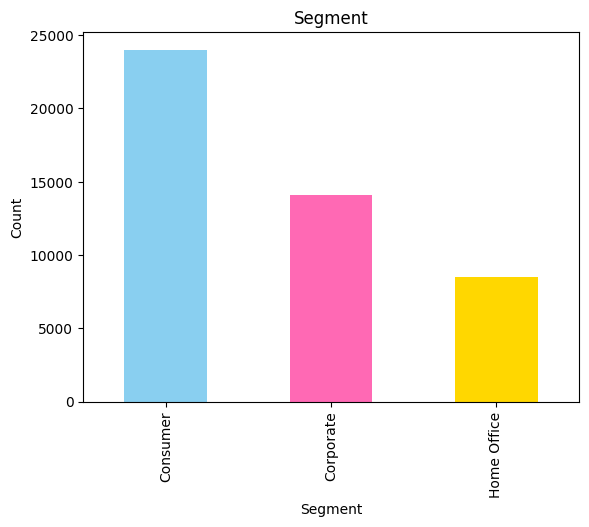

In [ ]:
df["Segment"].value_counts().plot(kind="bar", color=colors)
plt.title("Segment")
plt.ylabel("Count")
plt.show()

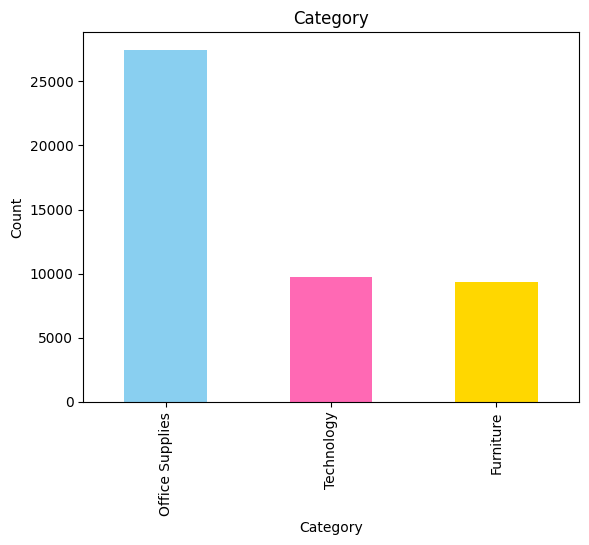

In [ ]:
df["Category"].value_counts().plot(kind="bar", color=colors)
plt.title("Category")
plt.ylabel("Count")
plt.show()

<h5>The number of orders for sub_category</h5>

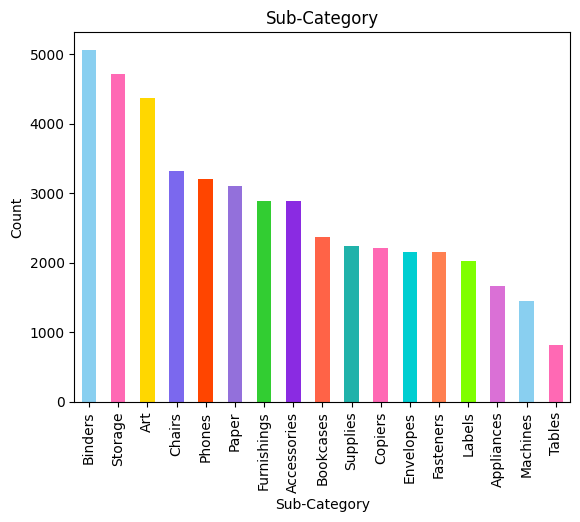

In [ ]:
df["Sub-Category"].value_counts().plot(kind="bar", color=colors)
plt.title("Sub-Category")
plt.ylabel("Count")
plt.show()

Sales **Trends**

<Axes: xlabel='Month'>

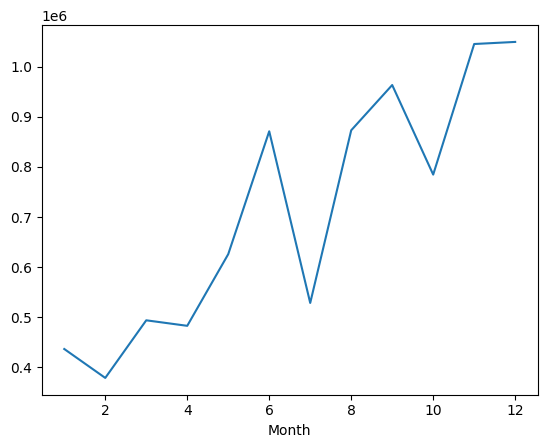

In [ ]:
df.groupby("Month")["Sales"].sum().plot(kind="line")

<Axes: xlabel='Season'>

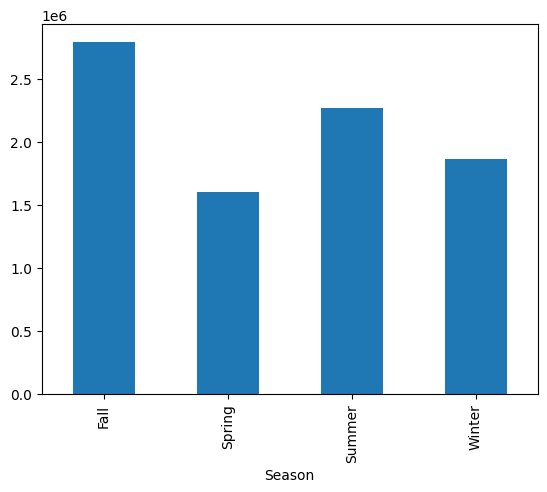

In [ ]:
df.groupby("Season")["Sales"].sum().plot(kind="bar")

In [ ]:
df.groupby("Season")["Sales"].sum().sort_values(ascending=False)

,Sales
Season,
Fall,2.792640e+06
Summer,2.272264e+06
Winter,1.864785e+06
Spring,1.602604e+06


**Top Products and Categories**

In [ ]:
df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)

,Sales
Sub-Category,
Phones,1.001632e+06
Chairs,1.000553e+06
Bookcases,9.354584e+05
Copiers,9.300828e+05
Storage,9.162440e+05
Accessories,5.863248e+05
Appliances,5.237462e+05
Machines,4.741832e+05
Tables,3.741394e+05


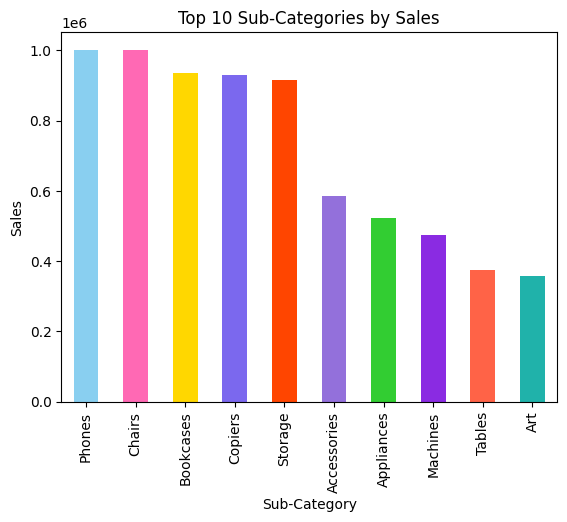

In [ ]:
df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).head(10).plot(kind="bar",color=colors)
plt.ylabel("Sales")
plt.title("Top 10 Sub-Categories by Sales")
plt.show()

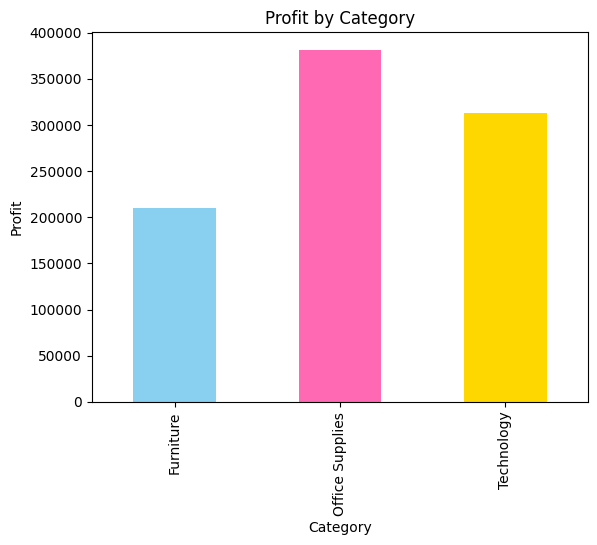

In [ ]:
df.groupby('Category')['Profit'].sum().plot(kind='bar',color=colors)
plt.ylabel('Profit')
plt.title('Profit by Category')
plt.show()

**The 10 customers with the highest number of orders.**

In [ ]:
df['Customer ID'].value_counts().head(10)

,count
Customer ID,
AP-109151404,23
EM-1396082,21
CS-121757,20
RW-195401404,19
JK-1609027,18
MP-1796545,17
KL-166451402,17
GG-146501404,17
MA-175601402,17


**The sales in weekend**

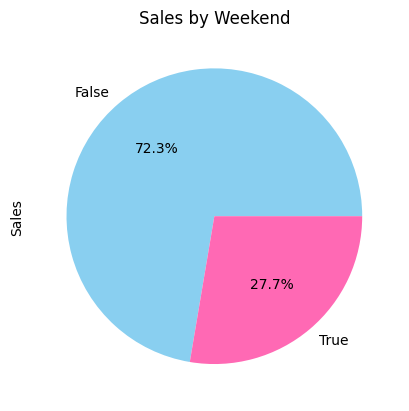

In [ ]:
df.groupby('IsWeekend')['Sales'].sum().plot(kind="pie",colors=colors,autopct='%1.1f%%')
plt.title('Sales by Weekend')
plt.show()

<h3 style="color:#70C1B3; font-weight:bold">Exploratory Data Analysis (EDA)</h3>


<h4 style="color:#FFE066; font-weight:bold">Pie Chart → Distribution of Ship Mode</h4>


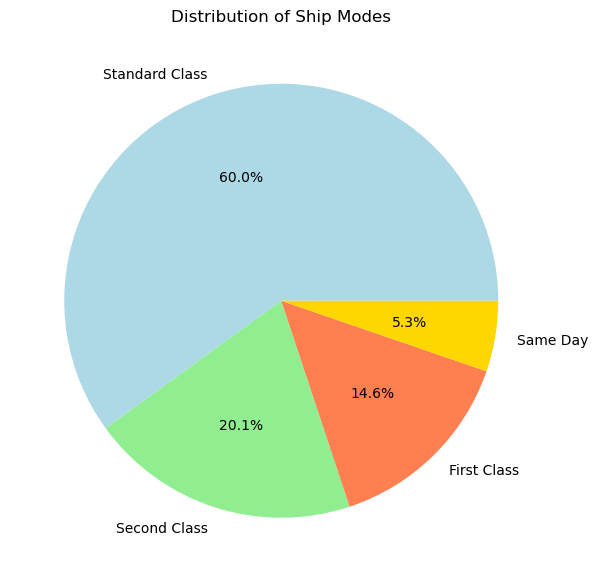

In [81]:
plt.figure(figsize=(7, 12))
data["Ship Mode"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "lightgreen", "coral", "gold"])
plt.title("Distribution of Ship Modes")
plt.ylabel("")  # Hide y-label
plt.show()


<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Total Sales by Category</h4>


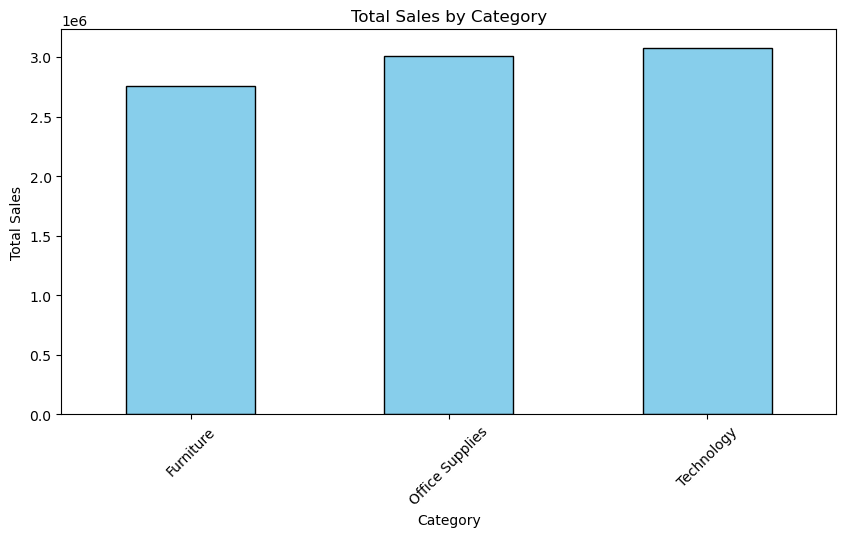

In [84]:
plt.figure(figsize=(10, 5))
data.groupby("Category")["Sales"].sum().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Sales by Category")
plt.ylabel("Total Sales")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Horizontal Bar Chart → Profit per Region</h4>


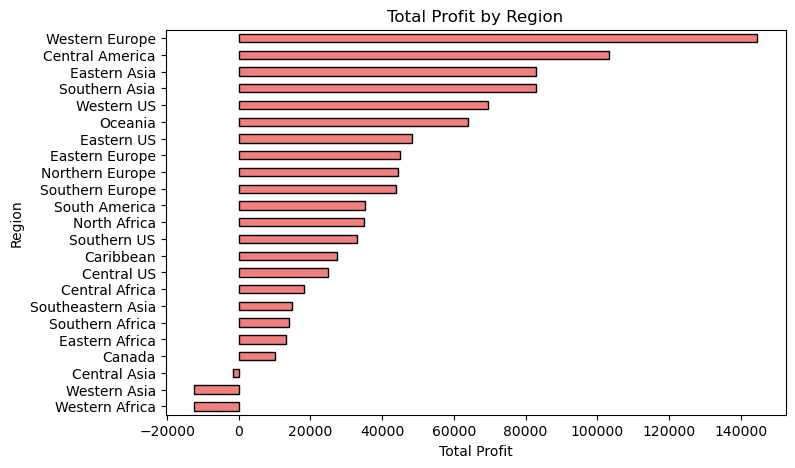

In [87]:
plt.figure(figsize=(8, 5))
data.groupby("Region")["Profit"].sum().sort_values().plot(kind="barh", color="lightcoral", edgecolor="black")
plt.title("Total Profit by Region")
plt.xlabel("Total Profit")
plt.ylabel("Region")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Correlation Heatmap → Relationships between Numerical Variables</h4>


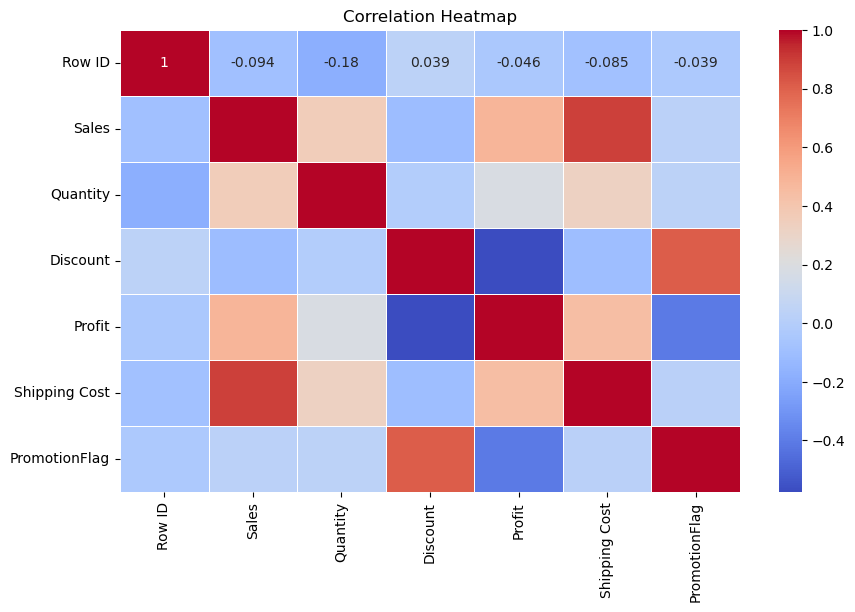

In [90]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.select_dtypes(include=["float64", "int64"]).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Scatter Plot → Shows if higher sales lead to higher profit</h4>


In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Sales'], y=data['Profit'], alpha=0.6)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vs. Profit")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Compares total sales across product categories</h4>


In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x=data['Category'], y=data['Sales'], estimator=sum, ci=None)
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Scatter Plot → Checks how discounts impact profit</h4>


In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=data['Discount'], y=data['Profit'], alpha=0.6)
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Discount vs. Profit")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Box Plot → Displays seasonal sales variations</h4>


In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=data['Season'], y=data['Sales'])
plt.xlabel("Season")
plt.ylabel("Sales")
plt.title("Sales Distribution by Season")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Compares total sales across different shipping modes</h4>


In [ ]:
plt.figure(figsize=(13, 5))
sns.barplot(x=data['Ship Mode'], y=data['Sales'], estimator=sum, ci=None)
plt.xlabel("Ship Mode")
plt.ylabel("Total Sales")
plt.title("Total Sales by Ship Mode")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Scatter Plot → Analyzes the relationship between quantity sold and sales</h4>


In [ ]:
plt.figure(figsize=(14, 5))
sns.scatterplot(x=data['Quantity'], y=data['Sales'], alpha=0.6)
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.title("Quantity vs. Sales")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Compare profitability across product categories</h4>


In [ ]:
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100
plt.figure(figsize=(12, 5))
sns.barplot(x=data['Category'], y=data['Profit Margin'], estimator=sum, ci=None)
plt.xlabel("Category")
plt.ylabel("Profit Margin (%)")
plt.title("Profit Margin by Category")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Identify which customer segment contributes the most to sales</h4>


In [ ]:
plt.figure(figsize=(13, 5))
sns.barplot(x=data['Segment'], y=data['Sales'], estimator=sum, ci=None)
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.title("Total Sales by Customer Segment")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Scatter Plot → See how discounts impact total sales</h4>


In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Discount'], y=data['Sales'], alpha=0.6)
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.title("Discount vs. Sales")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Compare regional profitability</h4>


In [ ]:
plt.figure(figsize=(13, 5))
sns.barplot(x=data['Region'], y=data['Profit'], estimator=sum, ci=None)
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.title("Total Profit by Region")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Histogram → Understand the frequency of order sizes</h4>


In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(data['Quantity'], bins=15, kde=True)
plt.xlabel("Quantity Ordered")
plt.ylabel("Frequency")
plt.title("Distribution of Order Quantity")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Scatter Plot → Determine if higher shipping costs relate to higher sales</h4>


In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=data['Shipping Cost'], y=data['Sales'], alpha=0.6)
plt.xlabel("Shipping Cost")
plt.ylabel("Sales")
plt.title("Sales vs. Shipping Cost")
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Bar Chart → Identify the most valuable customers</h4>


In [ ]:
top_customers = data.groupby('Customer Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 5))
top_customers.plot(kind="bar", color="purple")
plt.xlabel("Customer Name")
plt.ylabel("Total Sales")
plt.title("Top 10 Customers by Sales")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:#FFE066; font-weight:bold">Pie Chart → If payment mode data exists, compare payment preferences</h4>


In [ ]:
plt.figure(figsize=(12, 5))
data['Ship Mode'].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, cmap="viridis")
plt.ylabel("")
plt.title("Sales Proportion by Ship Mode")
plt.show()

<h2 style="color:#247BA0; font-weight:bold">Milestone 2: Advanced Data Analysis and Feature Engineering </h2>


<h3 style="color:#70C1B3; font-weight:bold">Advanced Data Analysis</h3>


In [ ]:
data_sales = data.groupby("Order Date")["Sales"].sum().reset_index()
data_sales.set_index("Order Date", inplace=True)
data_sales

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_sales, label="Daily Sales", color="blue", alpha=0.7)
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.savefig("sales_trend.png")

plt.show()

In [ ]:
decomposition = seasonal_decompose(data_sales, model="additive", period=365)
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(data_sales, label="Original", color="blue")
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Trend", color="green")
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Seasonality", color="orange")
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Residuals", color="red")
plt.legend()
plt.tight_layout()
plt.savefig("decomposition.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
adf_test = adfuller(data_sales["Sales"])
adf_results = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4]
}
print("ADF Test Results:", adf_results)

In [ ]:
correlation_cols = ["Sales", "Discount", "PromotionFlag", "IsWeekend", "Month", "Year"]
df_corr = data[correlation_cols]
correlation_matrix = df_corr.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 12})
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.savefig("Correlation.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
correlation_matrix

<h3 style="color:#70C1B3; font-weight:bold">Feature Engineering</h3>


<h3 style="color:#70C1B3; font-weight:bold">Data Visualization</h3>


In [ ]:
fig1 = px.histogram(data,
                    x='Sales',
                    nbins=50,
                    title='Distribution of Sales',
                    marginal='box',
                    color_discrete_sequence=['blue'])

fig1.update_layout(xaxis_title='Sales', yaxis_title='Frequency')
fig1.show()

fig2 = px.histogram(data,
                    x='Profit',
                    nbins=50,
                    title='Distribution of Profit',
                    marginal='violin',
                    color_discrete_sequence=['green'])

fig2.update_layout(xaxis_title='Profit', yaxis_title='Frequency')
fig2.show()

In [ ]:
fig = px.scatter(data,
                 x='Discount',
                 y='Sales',
                 opacity=0.6,
                 color='Discount',
                 title='Sales vs. Discount')

fig.update_layout(xaxis_title='Discount', yaxis_title='Sales')
fig.show()

In [ ]:
category_counts = data['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Sales Count']

fig = px.bar(category_counts,
             x='Category',
             y='Sales Count',
             color='Sales Count',
             title='Sales Count by Product Category')

fig.update_layout(xaxis_title="Category",
                  yaxis_title="Number of Sales",
                  xaxis_tickangle=-45)

fig.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Discount'])
plt.title("Distribution of Discounts")
plt.xlabel("Discount Percentage")
plt.show()

In [ ]:
def plot_sales_over_time(region=None, year=None, promotion=None):
    filtered_df = filter_data(region, year, promotion)

    filtered_df = filtered_df.sort_values(by='Order Date')

    sales_trend = filtered_df.groupby('Order Date')['Sales'].sum().reset_index()

    if sales_trend.empty:
        print("No data available for the selected filters!")
        return

    fig = px.line(sales_trend, x='Order Date', y='Sales', title='Sales Over Time')
    fig.update_xaxes(title_text='Order Date', tickformat='%Y-%m-%d')
    fig.update_yaxes(title_text='Sales')
    fig.show()

plot_sales_over_time()

In [ ]:
data['Profit'] = pd.to_numeric(data['Profit'], errors='coerce')

def plot_profit_by_region():
    region_profit = data.groupby('Region')['Profit'].sum().reset_index()

    fig = px.choropleth(region_profit,
                        locations='Region',
                        locationmode='ISO-3',
                        color='Profit',
                        title='Total Profit by Region',
                        color_continuous_scale='Blues')

    fig.update_layout(geo=dict(showcoastlines=True))
    fig.show()

plot_profit_by_region()

In [ ]:
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

def plot_quantity_by_product(top_n=10):
    product_quantity = data.groupby('Product Name')['Quantity'].sum().reset_index()

    product_quantity = product_quantity.sort_values(by='Quantity', ascending=False).head(top_n)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=product_quantity, x='Quantity', y='Product Name', palette='viridis')

    plt.title(f'Top {top_n} Products by Quantity Sold', fontsize=14)
    plt.xlabel('Quantity', fontsize=12)
    plt.ylabel('Product Name', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

plot_quantity_by_product(10)

<h3 style="color:#70C1B3; font-weight:bold">Ahmed's Model</h3>


In [ ]:
data['Sales'] = data['Sales'].apply(lambda x: max(x, 0))

In [ ]:
# 1. حساب عدد مرات الشراء لكل عميل ومنتج
purchase_counts = data.groupby(['Product ID', 'Customer ID']).size().reset_index(name='Purchase Count')

# 2. ربط الشراء مع مبيعات المنتج
# فلترة البيانات لتكون مبيعات المنتج فقط
df_sales = data[['ds', 'Product ID', 'Sales']].copy()
df_sales.rename(columns={'Sales': 'y'}, inplace=True)

# دمج بيانات المبيعات مع بيانات عدد مرات الشراء
df_combined = df_sales.merge(purchase_counts, on='Product ID', how='left')

# **2. Train Model**

In [ ]:
m = Prophet(interval_width=0.50, daily_seasonality=True)
model = m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpq6f9rjc5/zrlrnn3w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq6f9rjc5/a_g_257r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18556', 'data', 'file=/tmp/tmpq6f9rjc5/zrlrnn3w.json', 'init=/tmp/tmpq6f9rjc5/a_g_257r.json', 'output', 'file=/tmp/tmpq6f9rjc5/prophet_modelozbpz5us/prophet_model-20250410170706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:07:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:07:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **3. Forecast Away**

In [ ]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,360.480419,49.969823,311.207867,360.480419,360.480419,-183.225757,-183.225757,-183.225757,-190.460799,...,4.732385,4.732385,4.732385,2.502657,2.502657,2.502657,0.0,0.0,0.0,177.254662
1,2012-01-02,360.488429,38.589454,291.009110,360.488429,360.488429,-195.645350,-195.645350,-195.645350,-190.460799,...,-7.374043,-7.374043,-7.374043,2.189493,2.189493,2.189493,0.0,0.0,0.0,164.843079
2,2012-01-03,360.496439,38.786711,297.268530,360.496439,360.496439,-190.967627,-190.967627,-190.967627,-190.460799,...,-2.365616,-2.365616,-2.365616,1.858788,1.858788,1.858788,0.0,0.0,0.0,169.528811
3,2012-01-04,360.504448,48.686482,310.717771,360.504448,360.504448,-189.211647,-189.211647,-189.211647,-190.460799,...,-0.270888,-0.270888,-0.270888,1.520040,1.520040,1.520040,0.0,0.0,0.0,171.292801
4,2012-01-05,360.512458,45.832317,296.079654,360.512458,360.512458,-190.091646,-190.091646,-190.091646,-190.460799,...,-0.813988,-0.813988,-0.813988,1.183142,1.183142,1.183142,0.0,0.0,0.0,170.420812


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,2012-01-01,177.254662,49.969823,311.207867
1,2012-01-02,164.843079,38.589454,291.009110
2,2012-01-03,169.528811,38.786711,297.268530
3,2012-01-04,171.292801,48.686482,310.717771
4,2012-01-05,170.420812,45.832317,296.079654


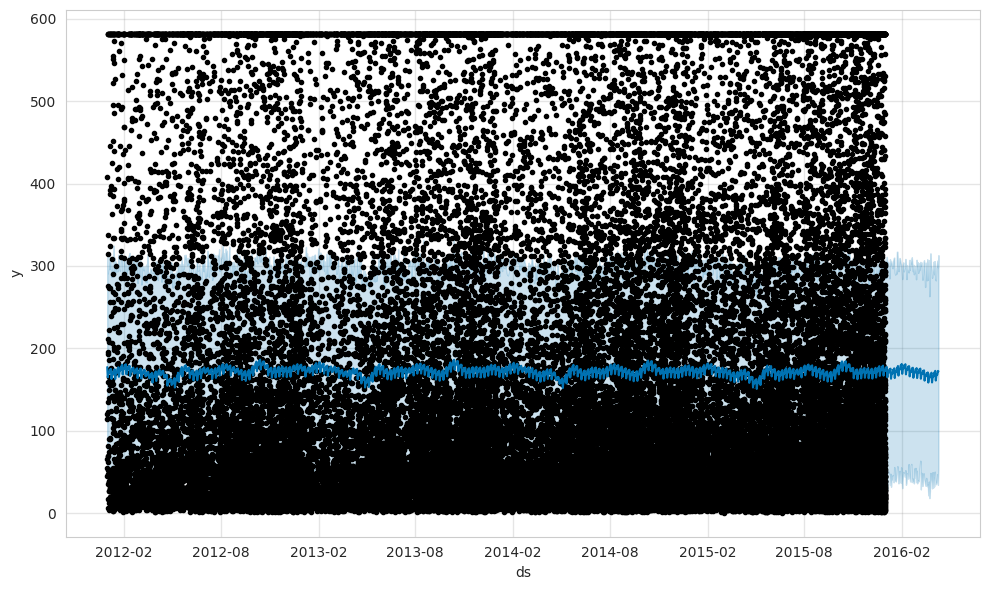

In [ ]:

plot1 = m.plot(forecast)


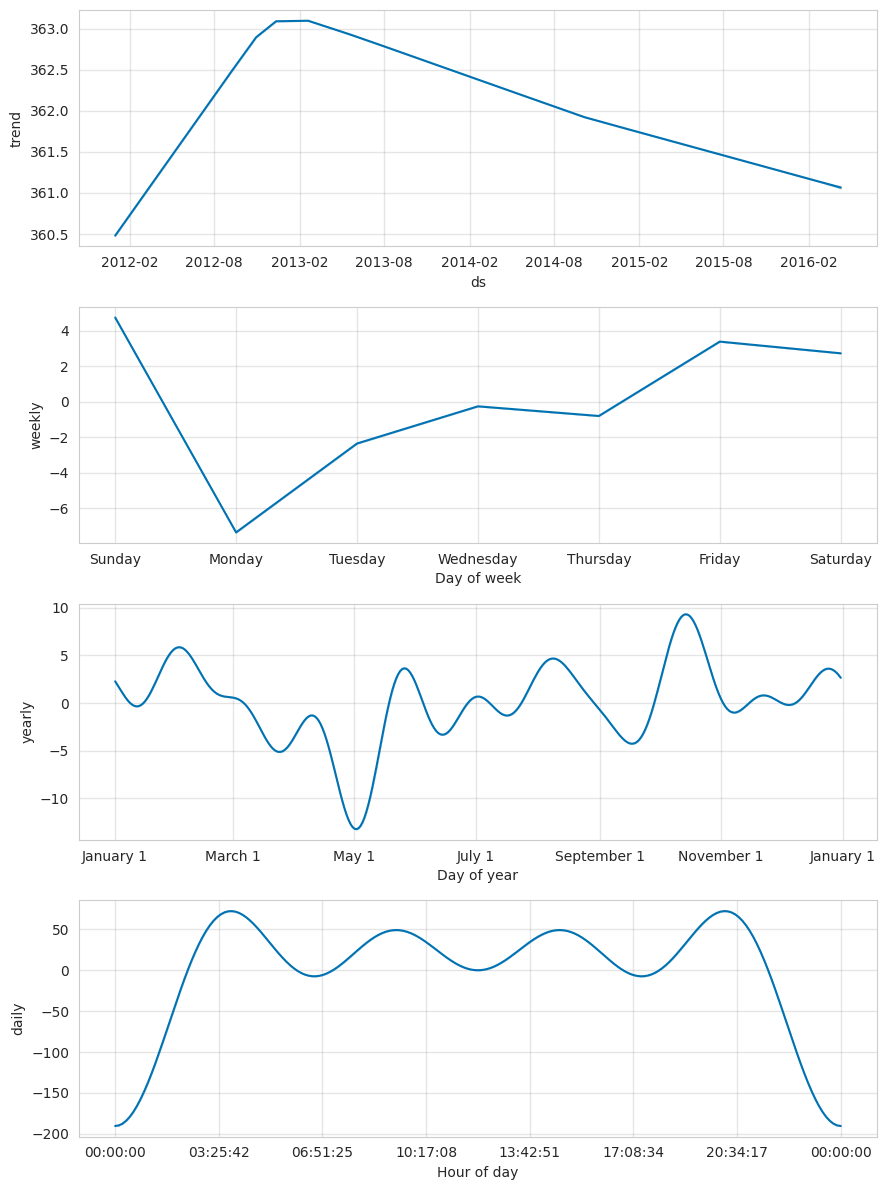

In [ ]:
plt2 = m.plot_components(forecast)
